<a href="https://colab.research.google.com/github/pavanramadass/machine-learning-projects/blob/main/Assignment2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Task 1

In [ ]:
# Data Set:
# https://www.kaggle.com/kandij/diabetes-dataset

# Importing Required Libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score 
from mlxtend.plotting import plot_confusion_matrix
from google.colab import files
import io

# Data preprocessing 
uploaded = files.upload()
data = pd.read_csv(io.BytesIO(uploaded['diabetes2.csv']))

X = data.iloc[:, : -1].values
y = data.iloc[:, -1].values

# Splitting data into Train and Test sets 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

# Standard Scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

# Decision Tree Classifier 
classifier1 = DecisionTreeClassifier(criterion='entropy', random_state=0)
classifier2 = DecisionTreeClassifier(criterion='entropy', random_state=1000)
classifier1.fit(X_train, y_train)
classifier2.fit(X_train, y_train)

# Confusion Matrix for Classifier 1
y_pred1 = classifier1.predict(X_test)
cm = confusion_matrix(y_test, y_pred1)
fig, ax = plot_confusion_matrix(conf_mat=cm, figsize=(3,3), cmap=plt.cm.Greens)
plt.xlabel('Predictions', fontsize=12)
plt.ylabel('Actuals', fontsize=12)
plt.title('Classifier 1 Confusion Matrix', fontsize=14)
plt.show()

# Confusion Matrix for Classifier 2
y_pred2 = classifier2.predict(X_test)
cm = confusion_matrix(y_test, y_pred2)
fig, ax = plot_confusion_matrix(conf_mat=cm, figsize=(3,3), cmap=plt.cm.Greens)
plt.xlabel('Predictions', fontsize=12)
plt.ylabel('Actuals', fontsize=12)
plt.title('Classifier 2 Confusion Matrix', fontsize=14)
plt.show()

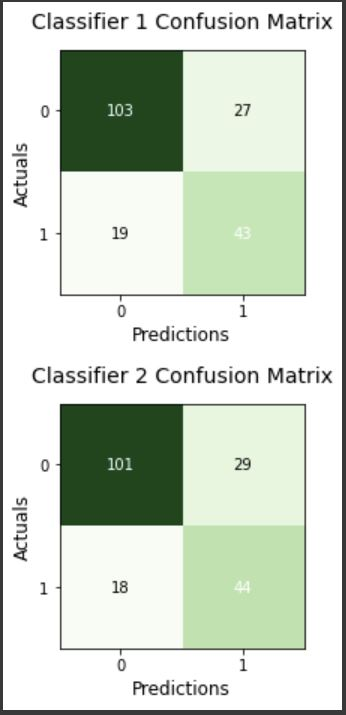

I compared the two classifiers with the confusion matrix. Classifier 2 with criterion of gini and random state of 1000 had one less false negative compared to Classifier 1, but Classifier 1 had two less false positives than Classifier 2. However, since this is medical data and we want to reduce the amount of false negatives, Classifier 2 is the better option. I changed the random_state parameter to 1000, because I wanted to see how this seed will affect the performance. I predicted for a significant change in results when changing the random_state from 0 to 1000, but the change was very minimal in a positive way because the false negatives decreased by 1 (although I hoped for more reduction in the false negatives). And, although I changed the criterion from entropy to gini, both entropy and gini criterions at random_state=1000 had the same results in the confusion matrix. 

Task 2

In [ ]:
import numpy as np
from numpy import mean, std 
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from google.colab import files
import io

# Data Preprocessing 
uploaded = files.upload()
data = pd.read_csv(io.BytesIO(uploaded['diabetes2.csv']))

X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

# Bagging Model
model_bagging = BaggingClassifier(n_estimators=50,random_state=1000)

# Boosting Model 
model_boosting = AdaBoostClassifier(n_estimators=50, random_state=1000)

# Model Evaluation
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
bagging_scores = cross_val_score(model_bagging, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
boosting_scores = cross_val_score(model_boosting, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')

# Report Performance
print('Accuracy of bagging: %.3f (%.3f)' % (mean(bagging_scores), std(bagging_scores)))
print('Accuracy of boosting: %.3f (%.3f)' % (mean(boosting_scores), std(boosting_scores)))

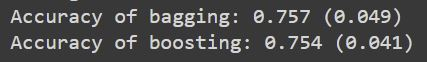


Comparing bagging and boosting, bagging has a better accuracy than boosting. For bagging, I used the bagging classifier from sklearn, and for boosting, I used the AdaBoost classifier from sklearn. Bagging has a mean accuracy of 0.757 with standard deviation of 0.049, while boosting had a mean accuracy of 0.754 with a standard deviation of 0.041. Since boosting has a smaller standard deviation than boosting, boosting is a little more precise. 

Task 3

In [ ]:
import numpy as np
from numpy import mean, std 
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score 
from mlxtend.plotting import plot_confusion_matrix
from google.colab import files
import io

# Data preprocessing 
uploaded = files.upload()
data = pd.read_csv(io.BytesIO(uploaded['diabetes2.csv']))

X = data.iloc[:, : -1].values
y = data.iloc[:, -1].values

# Splitting data into Train and Test sets 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

# Standard Scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

# Decision Tree Classifier 
classifier = DecisionTreeClassifier(criterion='gini', random_state=1000)
classifier.fit(X_train, y_train)

# Bagging Model
model_bagging = BaggingClassifier(n_estimators=50, random_state=1000)
model_bagging.fit(X_train, y_train)

# Boosting Model 
model_boosting = AdaBoostClassifier(n_estimators=50, random_state=1000)
model_boosting.fit(X_train, y_train)

# Confusion Matrix for Decision Tree Classifier Model
y_pred1 = classifier.predict(X_test)
cm1 = confusion_matrix(y_test, y_pred1)


# Confusion Matrix for Bagging Model
y_pred2 = model_bagging.predict(X_test)
cm2 = confusion_matrix(y_test, y_pred2)


# Confusion Matrix for Boosting Model
y_pred3 = model_boosting.predict(X_test)
cm3 = confusion_matrix(y_test, y_pred3)

# Precision Calculation and Printing for DTC
DTC_Precision = cm1[0][0] / (cm1[0][0] + cm1[0][1])
DTC_Precision_Formatted = "{:.3f}".format(DTC_Precision)
print("Decision Tree Classifier Precision: ", float(DTC_Precision_Formatted))

# Precision Calculation and Printing for Bagging
Bagging_Precision = cm2[0][0] / (cm2[0][0] + cm2[0][1])
Bagging_Precision_Formatted = "{:.3f}".format(Bagging_Precision)
print("Bagging Precision: ", float(Bagging_Precision_Formatted))

# Precision Calculation and Printing for Boosting 
Boosting_Precision = cm3[0][0] / (cm3[0][0] + cm3[0][1]) 
Boosting_Precision_Formatted = "{:.3f}".format(Boosting_Precision)
print("Boosting Precision: ", float(Boosting_Precision_Formatted))

# CM Plot for DTC
fig, ax = plot_confusion_matrix(conf_mat=cm1, figsize=(3,3), cmap=plt.cm.Greens)
plt.xlabel('Predictions', fontsize=12)
plt.ylabel('Actuals', fontsize=12)
plt.title('Decision Tree Classifier Confusion Matrix', fontsize=14)
plt.show()

# CM Plot for Bagging
fig, ax = plot_confusion_matrix(conf_mat=cm2, figsize=(3,3), cmap=plt.cm.Greens)
plt.xlabel('Predictions', fontsize=12)
plt.ylabel('Actuals', fontsize=12)
plt.title('Bagging Confusion Matrix', fontsize=14)
plt.show()

# CM Plot for Boosting
fig, ax = plot_confusion_matrix(conf_mat=cm3, figsize=(3,3), cmap=plt.cm.Greens)
plt.xlabel('Predictions', fontsize=12)
plt.ylabel('Actuals', fontsize=12)
plt.title('Boosting Confusion Matrix', fontsize=14)
plt.show()

Precision Results:

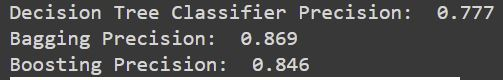

Confusion Matrix Results:

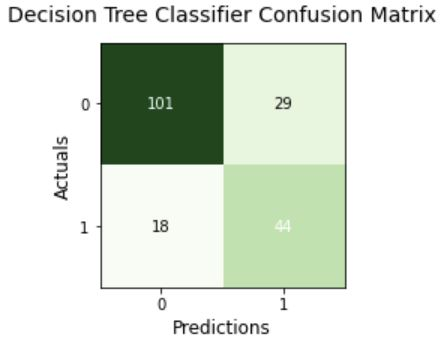

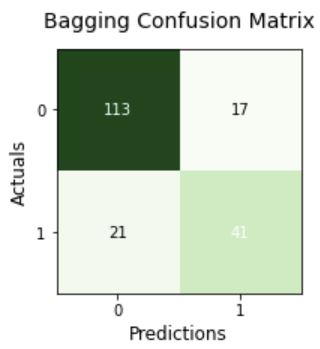

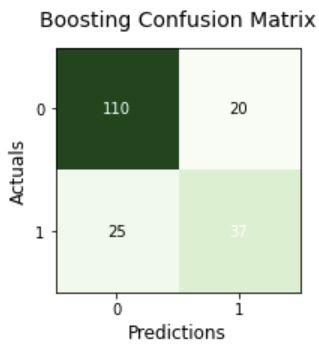

For comparing the effectiveness of the three models, I used the confusion matrix method. A confusion matrix, in short, calculates the total number of true positives, false positives, true negatives, and false negatives. Since my dataset is medical related (the model must determine who has diabetes), having a model with less false negatives is most important due to false negatives preventing patients from getting the proper treatment. Thus, comparing the three models using a confusion matrix will allow me to analyze which model has the least false negatives, and thus the better model. However, having too many false positives is also not good, because it will, in most cases, cause doctors to do further unnecessary and expensive tests to determine the treatment dosage and procedure. 
Thus, from the confusion matrix, a model with less false negatives and with less false positives is better, but having less false negatives outweighs having less false positives. Thus, a model with more false positives and less false negatives is better than a model with less false positives and more false negatives. 

After running the three models and testing them with the confusion matrix metric, the decision tree classifier model, is the best choice. It gave false negatives to 18 patients and false positives to 29 patients. The second best was the bagging method. It gave false negatives to 21 patients and false positives to 17 patients. Thus, the worst method was the Boosting method, because it gave false negatives to 25 patients and false positives to 20 patients.  

Hence, as a machine learning engineer/data scientist, I suggest using the decision tree method without bagging or boosting for determining which patient may have diabetes, because it had the least false negatives even though it had the most false positives. 

In comparison, had I used precision as my metric for determining the best model. I would have chosen the bagging model to be the best model, because it has the best precision. Although being precise is important, in terms of medicine, like stated before, reducing the false negatives is most important, especially for more serious illnesses like diabetes. Thus, going with the most precise model is not the best in this situation. 